Epoch 1/100
28/28 [==============================] - 4s 32ms/step - loss: 0.0521
Epoch 2/100
28/28 [==============================] - 1s 37ms/step - loss: 0.0075
Epoch 3/100
28/28 [==============================] - 1s 45ms/step - loss: 0.0054
Epoch 4/100
28/28 [==============================] - 1s 30ms/step - loss: 0.0052
Epoch 5/100
28/28 [==============================] - 1s 32ms/step - loss: 0.0046
Epoch 6/100
28/28 [==============================] - 1s 33ms/step - loss: 0.0044
Epoch 7/100
28/28 [==============================] - 1s 30ms/step - loss: 0.0043
Epoch 8/100
28/28 [==============================] - 1s 32ms/step - loss: 0.0039
Epoch 9/100
28/28 [==============================] - 1s 32ms/step - loss: 0.0037
Epoch 10/100
28/28 [==============================] - 1s 34ms/step - loss: 0.0036
Epoch 11/100
28/28 [==============================] - 1s 31ms/step - loss: 0.0034
Epoch 12/100
28/28 [==============================] - 1s 31ms/step - loss: 0.0035
Epoch 13/100
28/28 [=====

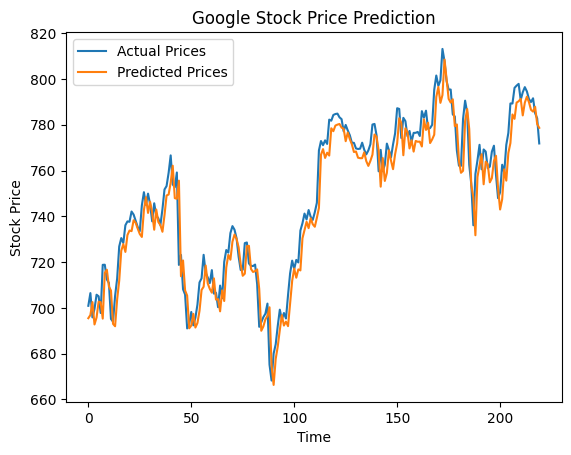

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/Google_Stock_Price_Train.csv")

# Convert "Close" column to numeric, coercing errors to NaN
data["Close"] = pd.to_numeric(data["Close"], errors='coerce')

# Drop rows with missing values
data.dropna(subset=["Close"], inplace=True)

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

# Function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 50

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform the scaled predictions

# Visualize the predictions
plt.plot(data["Close"].values[train_size+seq_length:], label="Actual Prices")
plt.plot(predictions, label="Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Google Stock Price Prediction")
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data["Close"].values[train_size+seq_length:], predictions))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 8.975378782555895
